In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

4423680/4422102 [==============================] - 0s 0us/step
(60000, 784) (10000, 784)


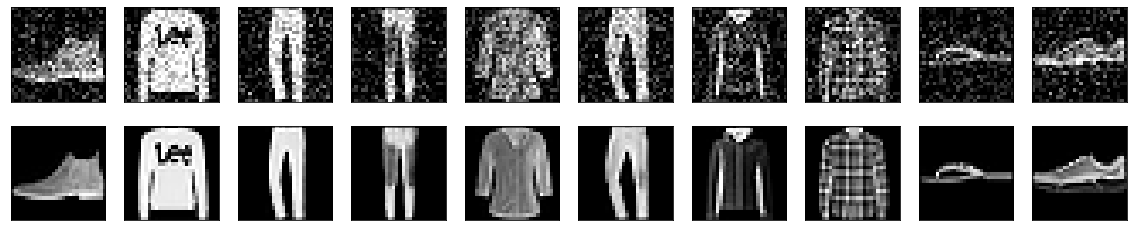

In [3]:

(x_train, _), (x_test, _) = fashion_mnist.load_data()
# Normalize train and test data
x_train = x_train.astype('float64') / 255.
x_test = x_test.astype('float64') / 255.

# Reshape so that each instance is a linear array of 784 normalized pixel values
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
print (x_train.shape, x_test.shape)

# Add random noise to the image
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

# Clip the resulting values so that they don't fall outside the upper and lower normalized value of 0 and 1
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


n = 10  # Number of images to display 

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [4]:
# main()

In [5]:
def sigmoid(X):
  sigmoid_output = 1 / (1 + tf.exp(-X))
  return sigmoid_output

In [6]:
def mean_absolute_error(y_actual, y_pred):
  element_diff = tf.cast(tf.abs(tf.math.subtract(y_actual,y_pred)),tf.float64)
  column_wise_sum = tf.reduce_sum(element_diff,axis = 0)
  mean_absolute_error = tf.reduce_mean(column_wise_sum)
  return mean_absolute_error


In [7]:
def forward_pass(X,W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6):

  hypo_1 = tf.matmul(W1 , X) + b1
  relu_act1 = tf.nn.relu(hypo_1)

  hypo_2 = tf.matmul(W2 , relu_act1 ) + b2
  relu_act2 = tf.nn.relu(hypo_2)

  hypo_3 = tf.matmul(W3 , relu_act2 ) + b3
  relu_act3 = tf.nn.relu(hypo_3)

  hypo_4 = tf.matmul(W4 , relu_act3 ) + b4
  relu_act4 = tf.nn.relu(hypo_4)

  hypo_5 = tf.matmul(W5 , relu_act4 ) + b5
  relu_act5 = tf.nn.relu(hypo_5)

  hypo_6 = tf.matmul(W6 , relu_act5 ) + b6
  #sigmoid
  pred_output = sigmoid(hypo_6)

  return pred_output

In [8]:
def autoencoder_decoder(X_train_noisy,X_train, X_test_noisy ,X_test):
  no_of_neurons_layer1 = 128
  no_of_neurons_layer2 = 64
  no_of_neurons_layer3 = 32
  #describes the number of types of clothes(10)
  no_of_output_units  = 10
  no_of_features = X_train.shape[0]

  W1 = tf.Variable(tf.random.normal(shape=(no_of_neurons_layer1, no_of_features), dtype=tf.float64) * 0.1)
  b1 = tf.Variable(tf.zeros((no_of_neurons_layer1, 1),dtype=tf.float64))

  W2 = tf.Variable(tf.random.normal(shape=(no_of_neurons_layer2, no_of_neurons_layer1),dtype=tf.float64) * 0.1)
  b2 = tf.Variable(tf.zeros((no_of_neurons_layer2, 1),dtype=tf.float64))

  W3 = tf.Variable(tf.random.normal(shape=(no_of_neurons_layer3, no_of_neurons_layer2), dtype=tf.float64) * 0.1)
  b3 = tf.Variable(tf.zeros((no_of_neurons_layer3, 1),dtype=tf.float64))

  W4 = tf.Variable(tf.random.normal(shape=(no_of_neurons_layer2, no_of_neurons_layer3),dtype=tf.float64) * 0.1)
  b4 = tf.Variable(tf.zeros((no_of_neurons_layer2, 1),dtype=tf.float64))

  W5 = tf.Variable(tf.random.normal(shape=(no_of_neurons_layer1, no_of_neurons_layer2),dtype=tf.float64) * 0.1)
  b5 =tf.Variable(tf.zeros((no_of_neurons_layer1, 1),dtype=tf.float64))

  W6 = tf.Variable(tf.random.normal(shape=(no_of_features, no_of_neurons_layer1), dtype=tf.float64) * 0.1)
  b6 =tf.Variable(tf.zeros((no_of_features, 1),dtype=tf.float64))

  learning_rate = 0.01
  adam_optimizer = tf.keras.optimizers.Adam(learning_rate)

  train_loss_list =[]
  test_loss_list = []

  no_of_iter = 500

  for i in range(no_of_iter):
    #GradientTape will record all the operation till it encounters gradient
    with tf.GradientTape() as tape:

      train_predictedYProb  = forward_pass(X_train_noisy, W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6 )
      train_loss = mean_absolute_error(X_train ,train_predictedYProb)
    
    gradients = tape.gradient(train_loss,[W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6])

    test_predictedYProb  = forward_pass(X_test_noisy, W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6 )
    test_loss = mean_absolute_error(X_test ,test_predictedYProb)
    
    train_loss_list.append(train_loss.numpy())
    test_loss_list.append(test_loss.numpy())

    adam_optimizer.apply_gradients(zip(gradients , [W1,b1,W2,b2,W3,b3,W4,b4,W5,b5,W6,b6]))

    print("Train Iteration :", i , "Training Loss :",train_loss.numpy())
    print("Test Iteration :", i , "Test Loss :",test_loss.numpy())

  return train_loss_list , test_loss_list,test_predictedYProb


In [9]:
print(x_train.shape)

(60000, 784)


In [ ]:
# # for easy multiplication now the shape of X_train(784,60000) and X_test(784,10000)
X_train_noisy = tf.cast(tf.transpose(x_train_noisy),tf.float64)
X_test_noisy  = tf.cast(tf.transpose(x_test_noisy),tf.float64)
X_train =    tf.convert_to_tensor(x_train.T ,dtype= tf.float64)
X_test =    tf.convert_to_tensor(x_test.T ,dtype= tf.float64)

train_loss_list , test_loss_list,test_predictedYProb = autoencoder_decoder(X_train_noisy,X_train, X_test_noisy ,X_test)

Train Iteration : 0 Training Loss : 299.94123931712096
Test Iteration : 0 Test Loss : 298.86757465545486
Train Iteration : 1 Training Loss : 268.60806836102245
Test Iteration : 1 Test Loss : 267.8179753480903
Train Iteration : 2 Training Loss : 226.58187885059323
Test Iteration : 2 Test Loss : 226.7160811263986
Train Iteration : 3 Training Loss : 195.76849000006342
Test Iteration : 3 Test Loss : 196.10983002771408
Train Iteration : 4 Training Loss : 187.78767672965998
Test Iteration : 4 Test Loss : 188.0850949032382
Train Iteration : 5 Training Loss : 181.13102494413013
Test Iteration : 5 Test Loss : 181.36225317849423
Train Iteration : 6 Training Loss : 174.9740484486953
Test Iteration : 6 Test Loss : 175.14083691164396
Train Iteration : 7 Training Loss : 172.44346796018377
Test Iteration : 7 Test Loss : 172.53466758733867
Train Iteration : 8 Training Loss : 170.83181191814958
Test Iteration : 8 Test Loss : 170.9070834753586
Train Iteration : 9 Training Loss : 168.11481710703328
Test 

In [ ]:
plt.plot(train_loss_list)
plt.plot(test_loss_list)
plt.title("loss")
plt.xlabel('number of iterations')
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
test_pred = tf.transpose(test_predictedYProb)

In [ ]:
n = 10  # Number of images to display 

plt.figure(figsize=(20, 4))
for i in range(n):

    # Display predicted
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_pred[i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

     # Display noisy input
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()